In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import random, uniform
from time import time
from curvedpy.geodesics.blackhole import BlackholeGeodesicIntegrator
from curvedpy.metrics.schwarzschild_metric import SchwarzschildMetricSpherical
from curvedpy.utils.conversions_SPH2PATCH_3D import cart_to_sph1, sph2_to_cart, cart_to_sph2, coords_cart_to_sph2, J_sph2_to_cart, J_cart_to_sph2



In [2]:
print(cp.__version__)

NameError: name 'cp' is not defined

In [2]:
# gi = BlackholeGeodesicIntegrator()
# gi_xyz = BlackholeGeodesicIntegrator(coordinates='xyz')

In [11]:
def get_random(max_step, coords, nr=100):
    #k0, x0 = [1, 0, 0], [-10, 0., 5.1] # Shoot on +z axis
    E = []
    stdE = []
    L = []
    stdL = []
    norm_k = []
    std_norm_k = []

    l = 50

    if coords == "sph":
        gi = BlackholeGeodesicIntegrator(coordinates="SPH2PATCH", theta_switch=-1)
    else:
        gi = BlackholeGeodesicIntegrator(coordinates=coords)

    metric_sph = SchwarzschildMetricSpherical(mass = gi.get_m())
    
    for i in range(nr):
        k0, x0 = [random(), random(), random()], np.array([uniform(-l, l), uniform(-l, l), uniform(-l, l)]) # Shoot on +z axis
        k0 = k0/np.linalg.norm(k0)
        #print(x0, k0)
        #print(k0)
        if np.linalg.norm(x0) > 2:
            #if coords == "sph":
            
            if coords == "xyz":
                k, x, r = gi.geodesic(k0, x0, max_step=max_step)
                k_t, k_x, k_y, k_z, _,_,_ = r.y
                t = r.t
                r['k_t'] = k_t
                r['t'] = t
            else:
                k, x, r = gi.geodesic(k0, x0, max_step=max_step)
                
            k_sph, x_sph = cart_to_sph1(k, x)
            k4 = np.array([r['k_t'], *k_sph])
            x4 = np.array([r['t'], *x_sph])
            if coords == "xyz":
                k4__ = metric_sph.oneform(k4, x4)
            else:
                k4__ = gi.get_metric().oneform(k4, x4)
            
            # print(np.dot( np.column_stack(k4__)[0], np.column_stack(k4)[0] ) )
            nk = np.array([np.dot(np.column_stack(k4__)[i], np.column_stack(k4)[i]) for i in range(len(np.column_stack(k4)))])
            
            norm_k.append(np.mean(nk))
            std_norm_k.append(np.std(nk))
            E.append(np.mean(k4__[0]))
            stdE.append(np.std(k4__[0]))
            L.append(np.mean(k4__[3]))
            stdL.append(np.std(k4__[3]))
    return np.array([np.mean(E), np.mean(stdE), np.mean(L), np.mean(stdL), np.mean(L), np.mean(norm_k), np.mean(std_norm_k)])

# Spherical coordinates 2 patches

In [12]:
E, stdE, L, stdL, L, norm_k, std_norm_k = np.column_stack(np.array([get_random(max_step, "SPH2PATCH") for max_step in [0.1, 1.0, 10, 100, 1000]]))

k.k=7.312853027918799e-09, std(E)=2.1980608012376328e-14, stdL=5.364921807122213e-07


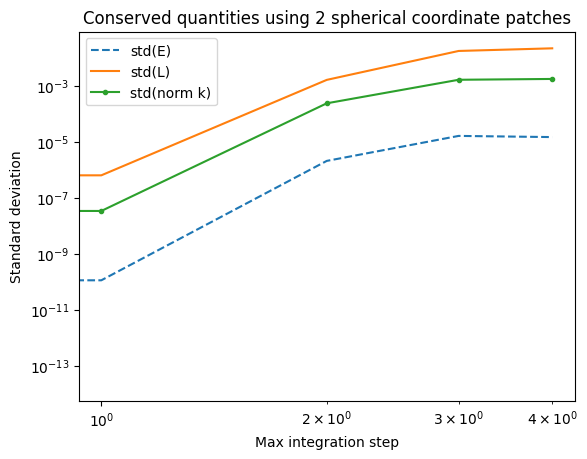

In [13]:

plt.title("Conserved quantities using 2 spherical coordinate patches")

plt.yscale('log')
plt.xscale('log')

plt.plot(stdE, "--", label="std(E)")
plt.plot(stdL, label="std(L)")
plt.plot(std_norm_k, ".-", label="std(norm k)")

plt.xlabel("Max integration step")
plt.ylabel("Standard deviation")
plt.legend()
print(f"k.k={float(norm_k[0])}, std(E)={float(stdE[0])}, stdL={stdL[0]}")

# Spherical coordinates 1 patch

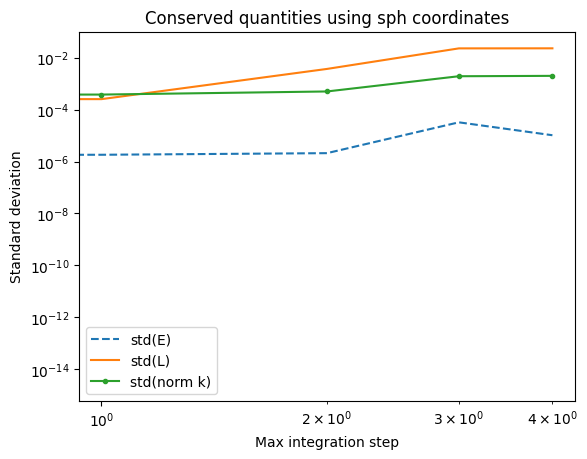

In [14]:
E, stdE, L, stdL, L, norm_k, std_norm_k = np.column_stack(np.array([get_random(max_step, "sph") for max_step in [0.1, 1.0, 10, 100, 1000]]))
plt.title("Conserved quantities using sph coordinates")
plt.yscale('log')
plt.xscale('log')

plt.plot(stdE, "--", label="std(E)")
plt.plot(stdL, label="std(L)")
plt.plot(std_norm_k, ".-", label="std(norm k)")

plt.xlabel("Max integration step")
plt.ylabel("Standard deviation")
plt.legend()

# Cartesian coordinates

In [15]:
E, stdE, L, stdL, L, norm_k, std_norm_k = np.column_stack(np.array([get_random(max_step, "xyz") \
                                                                    for max_step in [0.1, 1.0, 10, 100, 1000]]))


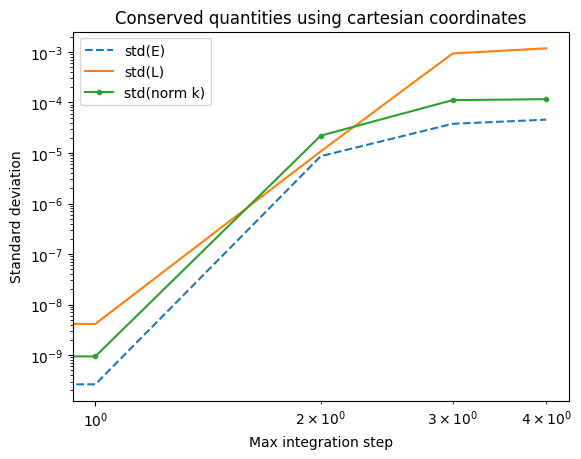

In [16]:
plt.title("Conserved quantities using cartesian coordinates")
plt.yscale('log')
plt.xscale('log')

plt.plot(stdE, "--", label="std(E)")
plt.plot(stdL, label="std(L)")
plt.plot(std_norm_k, ".-", label="std(norm k)")

plt.xlabel("Max integration step")
plt.ylabel("Standard deviation")
plt.legend()